<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Py_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!  pip install quandl


In [5]:
!  pip install quandl
import quandl
quandl.ApiConfig.api_key = 'Pu37EMDt2nmtD7bZ2FjM'

In [8]:
df_selic = quandl.get('BCB/432', trim_start='2009-01-01')
print(df_selic.shape)
df_selic.head()

(4676, 1)


,Value
Date,
2009-01-01,13.75
2009-01-02,13.75
2009-01-03,13.75
2009-01-04,13.75
2009-01-05,13.75


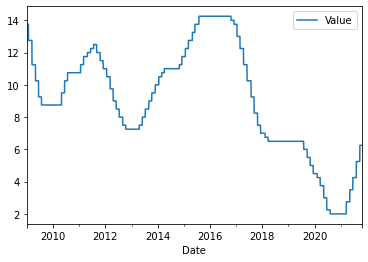

In [9]:
df_selic.plot()

In [11]:
df_ibov = quandl.get('BCB/7845', trim_start='2009-01-01')
df_ibov.tail()

,Value
Date,
2019-04-30,96353.0
2019-05-31,97030.0
2019-06-30,100967.0
2019-07-31,101812.0
2019-08-31,101134.0


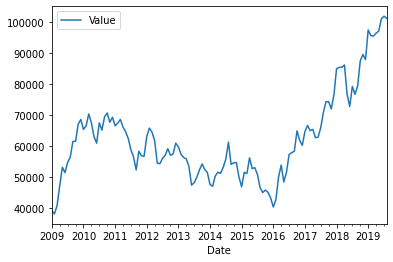

In [12]:
df_ibov.plot()

In [14]:
df_ipca = quandl.get('BCB/13522', trim_start='2009-01-01')
df_ipca.tail()

,Value
Date,
2021-05-31,8.06
2021-06-30,8.35
2021-07-31,8.99
2021-08-31,9.68
2021-09-30,10.25


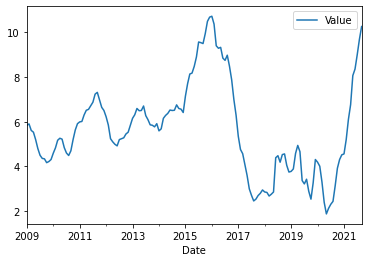

In [15]:
df_ipca.plot()

In [ ]:
#import matplotlib.pyplot as plt
#plt.plot(df_ibov)
#plt.plot(df_selic)




```
import pandas as pd
df = pd.concat([df_ibov/10000, df_selic],axis=1 ,join="inner")
print(df)
df.plot()```





```
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('IBOV', color=color)
ax1.plot(df_ibov, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Configurar um outro eixo vertical que compartilha o mesmo eixo X

color = 'tab:blue'
ax2.set_ylabel('SELIC', color=color) 
ax2.plot(df_selic, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
```



In [17]:
import pandas as pd
df_ibov_selic = pd.merge(df_ibov/10000, df_selic, on='Date')
df_ibov_selic.head()

,Value_x,Value_y
Date,,
2009-01-31,3.9300,12.75
2009-02-28,3.8183,12.75
2009-03-31,4.0926,11.25
2009-04-30,4.7289,10.25
2009-05-31,5.3197,10.25


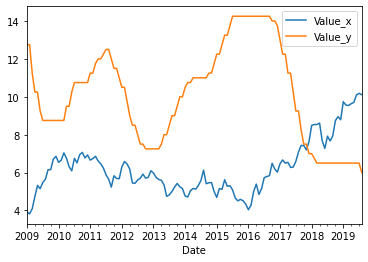

In [18]:
df_ibov_selic.plot()

In [19]:
#df_ibov_selic.columns = ['bovespa', 'selic']
df_ibov_selic_ipca = pd.merge(df_ibov_selic, df_ipca, on='Date')
df_ibov_selic_ipca.columns = ['bovespa', 'selic', 'ipca']
df_ibov_selic_ipca.head()

,bovespa,selic,ipca
Date,,,
2009-01-31,3.9300,12.75,5.84
2009-02-28,3.8183,12.75,5.90
2009-03-31,4.0926,11.25,5.61
2009-04-30,4.7289,10.25,5.53
2009-05-31,5.3197,10.25,5.20


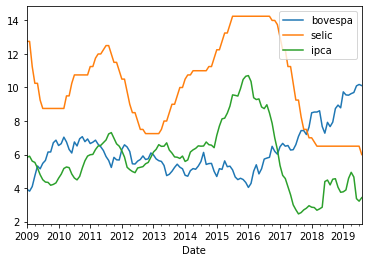

In [20]:
df_ibov_selic_ipca.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc768a9d510>,
      dtype=object)

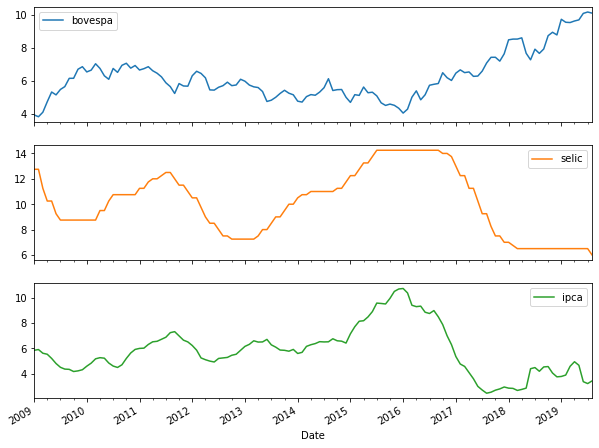

In [23]:
df_ibov_selic_ipca.plot(subplots=True, figsize=(10, 8))

In [24]:
correlacao = df_ibov_selic_ipca.corr()
correlacao

,bovespa,selic,ipca
bovespa,1.000000,-0.653393,-0.662880
selic,-0.653393,1.000000,0.789178
ipca,-0.662880,0.789178,1.000000


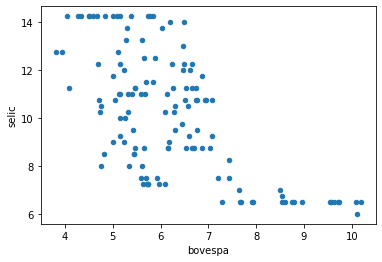

In [25]:
df_ibov_selic_ipca.plot(kind='scatter', x='bovespa', y='selic')


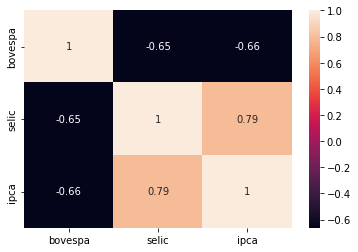

In [27]:
import seaborn as sns
sns.heatmap(correlacao, annot=True )


In [ ]:
#plt.scatter(x=df_ibov_selic_ipca['bovespa'],y=df_ibov_selic_ipca['selic'])

In [ ]:
#sns.scatterplot(data=df_ibov_selic_ipca, x='bovespa', y='selic')


In [ ]:
! pip install yfinance

In [31]:
import yfinance as yf


In [37]:
#import pandas_datareader as pdr
#df_ibov_yahoo = pdr.get_data_yahoo('^BVSP')
df_ibov_yahoo = yf.download('^BVSP')
df_ibov_yahoo

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0
...,...,...,...,...,...,...
2021-10-15,113189.000000,114776.000000,113049.000000,114648.000000,114648.000000,11174900
2021-10-18,114647.000000,114927.000000,112841.000000,114428.000000,114428.000000,11201300
2021-10-19,114422.000000,114422.000000,109947.000000,110673.000000,110673.000000,14129200




```
from pandas_datareader.data import DataReader
df_ibov_yahoo = DataReader('^BVSP', data_source='yahoo', start='2010-1-1')
df_ibov_yahoo.head()```



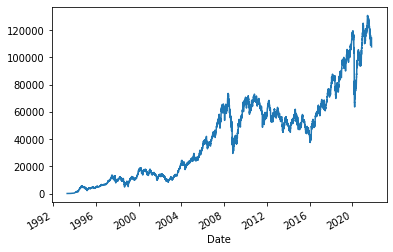

In [39]:
df_ibov_yahoo['Adj Close'].plot()


In [ ]:
#from pandas_datareader.data import DataReader
#DataReader('MOVI3.SA', data_source='yahoo', start='2010-1-1')['Adj Close']




```
st_itsa4 = 'ITSA4.SA'
st_flry3 = 'FLRY3.SA'
st_lren3 = 'LREN3.SA'

df_st = pd.DataFrame()
stocks = [st_itsa4, st_flry3, st_lren3]

for stock in stocks:
    df_st[stock] = DataReader(stock, data_source='yahoo',
                              start='2010-1-1')['Adj Close']
df_st.head()```





```
df_st.loc['2011-03-18':'2011-09-15', :].plot(figsize=(10, 4))
```



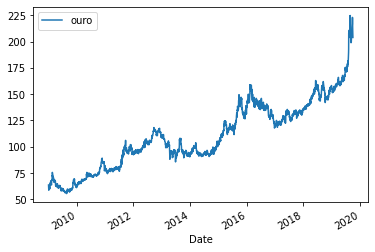

In [40]:
df_ouro = quandl.get('BCB/4', trim_start='2009-1-1')
df_ouro.columns = ['ouro']
df_ouro.plot()

In [41]:
!pip install yahoo_fin


In [50]:
from yahoo_fin.stock_info import get_data
#df_st_gol = DataReader('GOLL4.SA', data_source='yahoo', start='2010-1-1')
#df_st_gol.head()
df_st_gol=get_data('GOLL4.SA', start_date ='2010-1-1')
df_st_gol.head()

,open,high,low,close,adjclose,volume,ticker
2010-01-04,26.299999,26.400000,26.059999,26.299999,25.250458,1155600.0,GOLL4.SA
2010-01-05,26.309999,26.379999,25.639999,26.080000,25.039238,1749200.0,GOLL4.SA
2010-01-06,26.000000,26.540001,26.000000,26.379999,25.327267,1581400.0,GOLL4.SA
2010-01-07,26.100000,26.660000,25.920000,26.660000,25.596092,1057600.0,GOLL4.SA
2010-01-08,26.990000,28.200001,26.900000,27.950001,26.834614,3082100.0,GOLL4.SA


In [51]:
df_st_gol['diff'] = df_st_gol['close'] - df_st_gol['open']
df_st_gol.head()

,open,high,low,close,adjclose,volume,ticker,diff
2010-01-04,26.299999,26.400000,26.059999,26.299999,25.250458,1155600.0,GOLL4.SA,0.000000
2010-01-05,26.309999,26.379999,25.639999,26.080000,25.039238,1749200.0,GOLL4.SA,-0.230000
2010-01-06,26.000000,26.540001,26.000000,26.379999,25.327267,1581400.0,GOLL4.SA,0.379999
2010-01-07,26.100000,26.660000,25.920000,26.660000,25.596092,1057600.0,GOLL4.SA,0.559999
2010-01-08,26.990000,28.200001,26.900000,27.950001,26.834614,3082100.0,GOLL4.SA,0.960001


In [54]:
import plotly.graph_objects as go
go.Figure(data=go.Candlestick(x=df_st_gol.index,
                              open=df_st_gol['open'],
                              high=df_st_gol['high'],
                              low=df_st_gol['low'],
                              close=df_st_gol['close']))

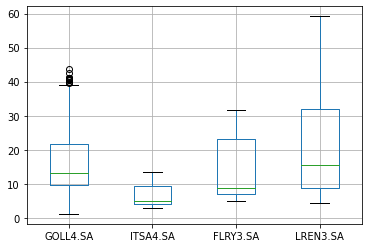

In [62]:

df_gol=get_data('GOLL4.SA', start_date ='2010-1-1')
df_itau=get_data('ITSA4.SA', start_date ='2010-1-1')
df_fleury=get_data('FLRY3.SA', start_date ='2010-1-1')
df_renner=get_data('LREN3.SA', start_date ='2010-1-1')
acoes = pd.concat([df_gol['adjclose'],df_itau['adjclose'],df_fleury['adjclose'],df_renner['adjclose']],axis=1)
acoes.columns = [ 'GOLL4.SA' ,'ITSA4.SA' ,'FLRY3.SA' ,'LREN3.SA']
acoes.boxplot()



```
df_st_gol['candle'] = np.where(df_st_gol['Open']>df_st_gol['Close'],
                               'baixa', 'alta')
df_st_gol.head()
```





```
df_tudo_ouro.drop(['bovespa', 'ouro'], axis=1).plot.box()
```

